# Normalized Spectrograms
In this notebook I will be creating normalized spectrograms of different wave waveforms in an attempt to recreate the plots seen in [this paper](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021JB021716).

In [181]:
# basic imports
from obspy.clients.fdsn import Client
from obspy import read
import obspy
import numpy as np
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib as mplt
import matplotlib.dates as mdates

In [182]:
# retrieve the data shown in the paper
starttime = UTCDateTime('2015-01-27T09:14:46')
endtime = starttime + 4

# find parameters for data query
client = Client('IRIS')
net = 'XH'
sta = 'DR03'
loc = '--'
chan = 'HHE'

# query for data
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

st_rem = st.copy()

In [183]:
st_rem.detrend('linear')

1 Trace(s) in Stream:
XH.DR03..HHE | 2015-01-27T09:14:46.000000Z - 2015-01-27T09:14:50.000000Z | 200.0 Hz, 801 samples

In [184]:
st_rem.taper(max_percentage=0.05,type='hann')

1 Trace(s) in Stream:
XH.DR03..HHE | 2015-01-27T09:14:46.000000Z - 2015-01-27T09:14:50.000000Z | 200.0 Hz, 801 samples

In [185]:
st_rem = st_rem.remove_response(output='ACC', plot=False)

In [186]:
st_rem.decimate(4)

1 Trace(s) in Stream:
XH.DR03..HHE | 2015-01-27T09:14:46.000000Z - 2015-01-27T09:14:50.000000Z | 50.0 Hz, 201 samples

In [187]:
st_rem.filter('bandpass', freqmin = 3.0, freqmax = 20.0)

1 Trace(s) in Stream:
XH.DR03..HHE | 2015-01-27T09:14:46.000000Z - 2015-01-27T09:14:50.000000Z | 50.0 Hz, 201 samples

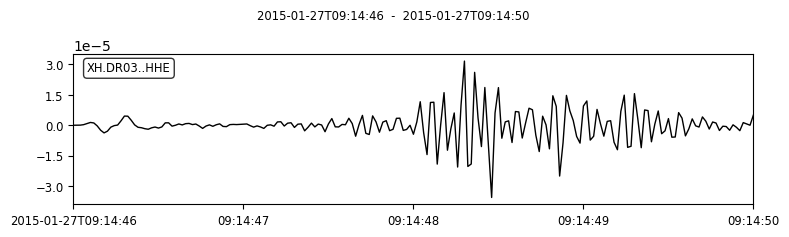

In [188]:
st_rem.plot();